<a href="https://colab.research.google.com/github/iamasifiqbal/ML_Projects/blob/main/Covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data  = pd.read_excel("COVID-19.xlsx")

In [ ]:
data

,Country,Temperature past week,Humidity,Number of cases per millions,Number of cases
0,USA,12.0,72.0,742.0,245442
1,Spain,10.0,69.0,2518.0,117710
2,Italy,13.0,55.0,1906.0,115242
3,Germany,5.0,55.0,1015.0,85063
4,China,15.0,33.0,57.0,81620
...,...,...,...,...,...
200,Caribbean Netherlands,6.0,61.0,0.3,2
201,St. Vincent Grenadines,27.0,73.0,18.0,2
202,Sierra Leone,30.0,68.0,76.0,2
203,Papua New Guinea,27.0,90.0,0.1,1


In [ ]:
new_data = data.iloc[1:, :]

new_data = new_data.dropna()
pre_y = new_data['Number of cases per millions']
# new_data.columns

In [ ]:
y = np.log(new_data['Number of cases per millions'])
x = new_data['Temperature past week']
y

1      7.831220
2      7.552762
3      6.922644
4      4.043051
5      6.807935
         ...   
200   -1.203973
201    2.890372
202    4.330733
203   -2.302585
204   -0.223144
Name: Number of cases per millions, Length: 202, dtype: float64

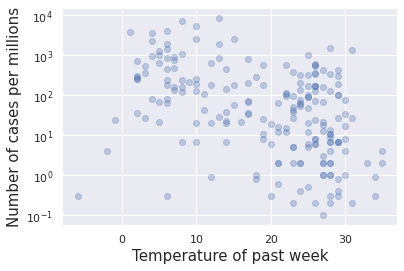

In [ ]:
plt.scatter(x, pre_y , alpha = .3)
plt.yscale("log")
# plt.xticks( labels=[ 10,20,30] )
plt.xlabel("Temperature of past week",fontsize = 15)
plt.ylabel("Number of cases per millions" , fontsize = 15)
plt.show()

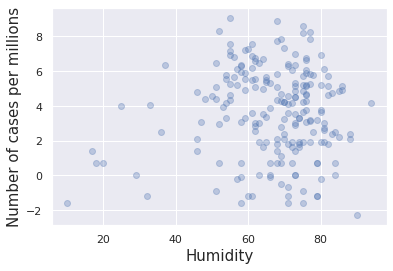

In [ ]:
plt.scatter(new_data['Humidity'], np.log(new_data['Number of cases per millions']) , alpha = .3)
plt.xlabel("Humidity",fontsize = 15)
plt.ylabel("Number of cases per millions" , fontsize = 15)
plt.show()

In [ ]:
x_matrix = x.values.reshape(-1,1)

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x_matrix,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

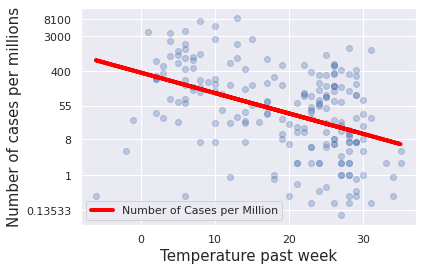

In [ ]:
plt.scatter(x,y, alpha = .3)

# y1 = [0,2000,4000,6000,8000,10000]
plt.yticks([-2,0,2.07944,4.00733,5.991,8.00636,8.9996],[.13533,1,8,55,400,3000,8100])
yhat = reg.coef_ * x + reg.intercept_
fig = plt.plot(x,yhat, lw=4 , c = "red", label = 'Number of Cases per Million')
plt.xlabel("Temperature past week",fontsize = 15)
plt.ylabel("Number of cases per millions" , fontsize = 15)
plt.legend()
plt.show()